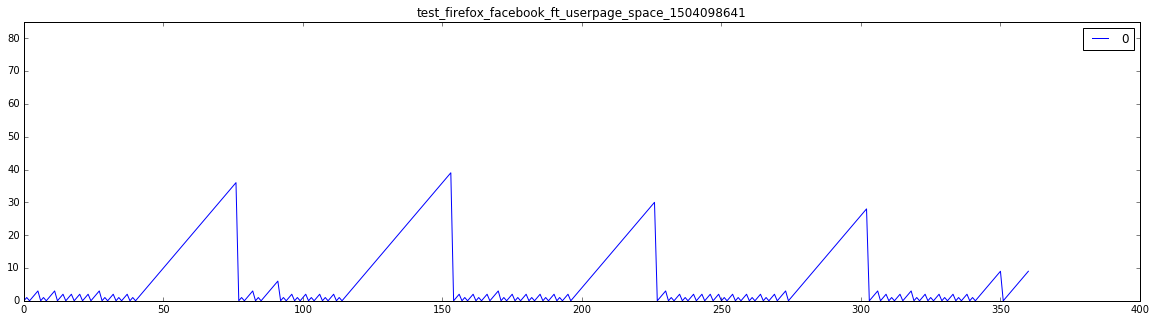

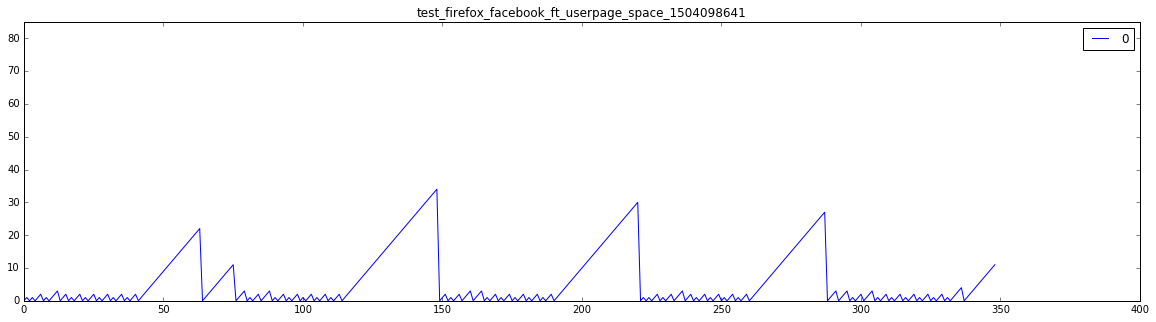

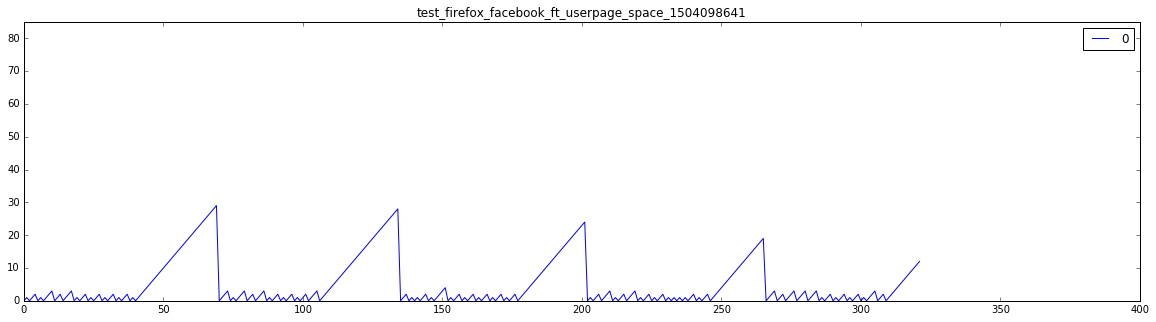

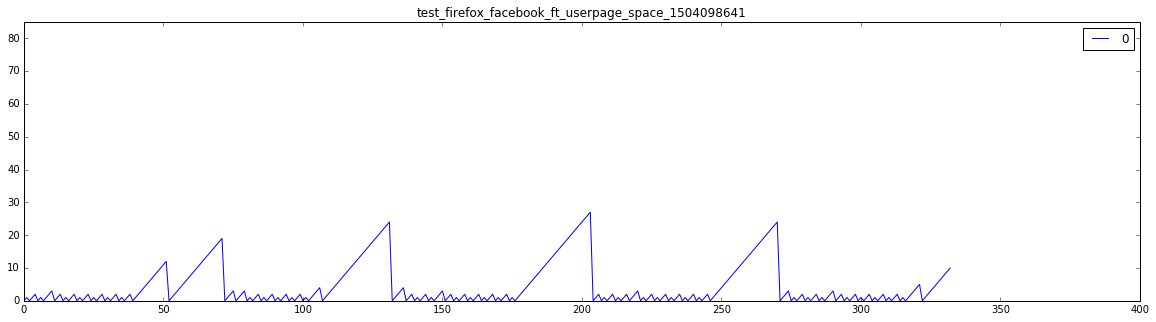

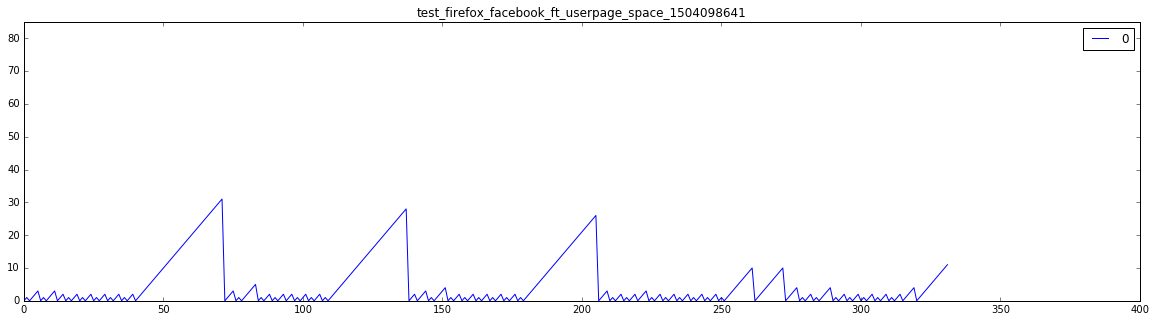

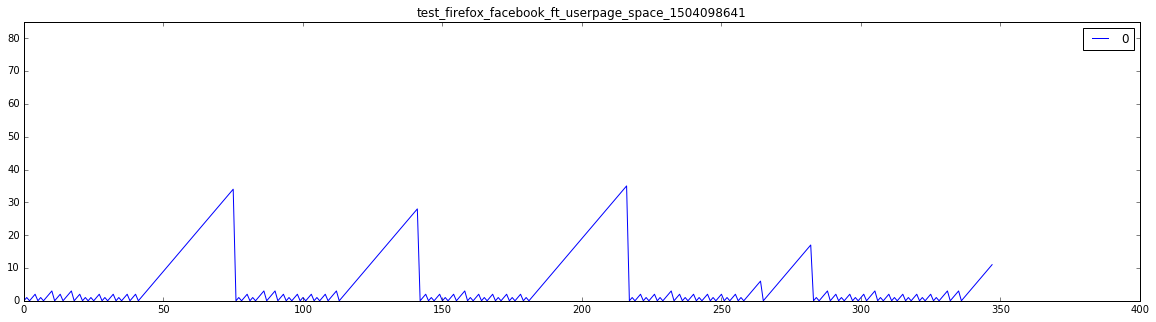

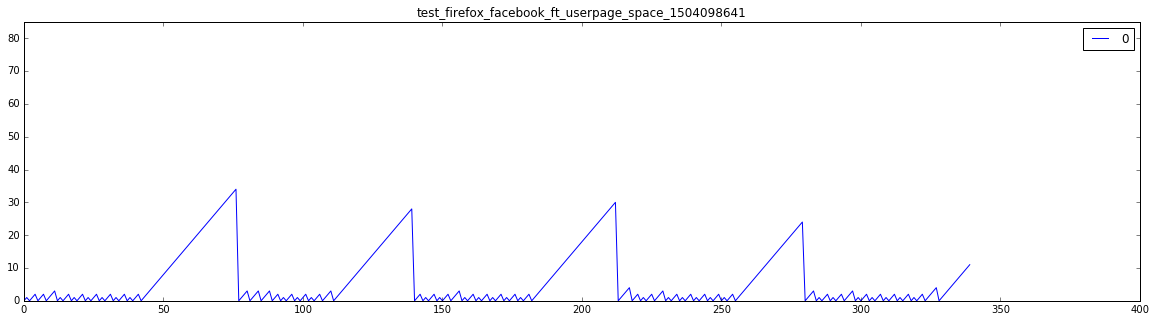

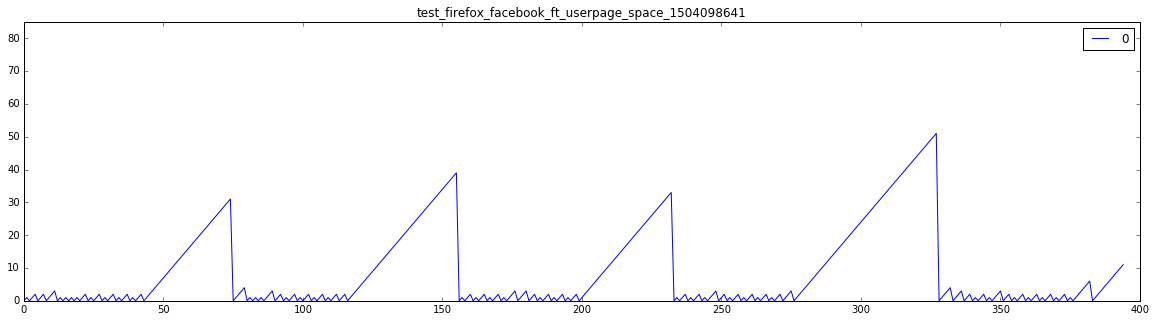

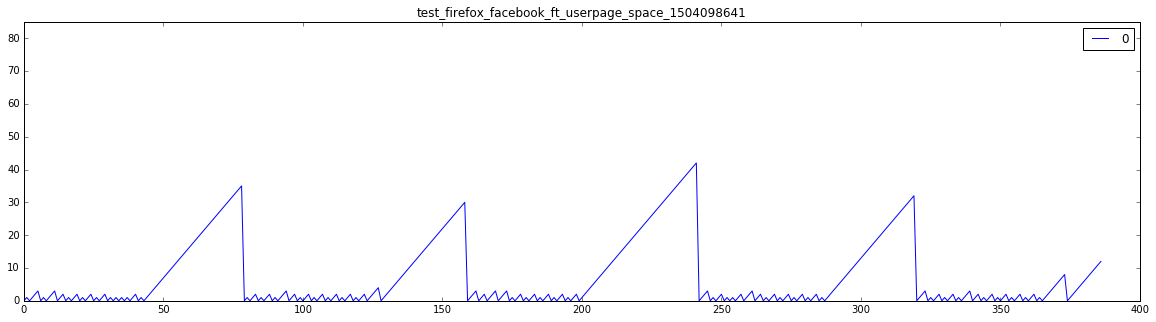

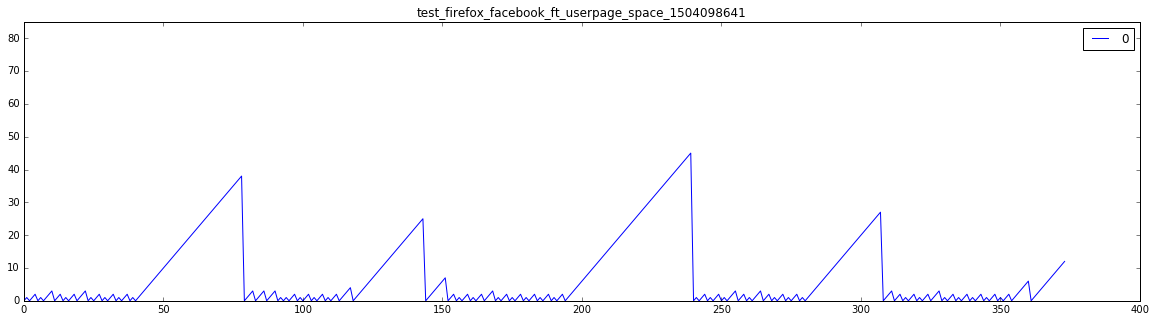

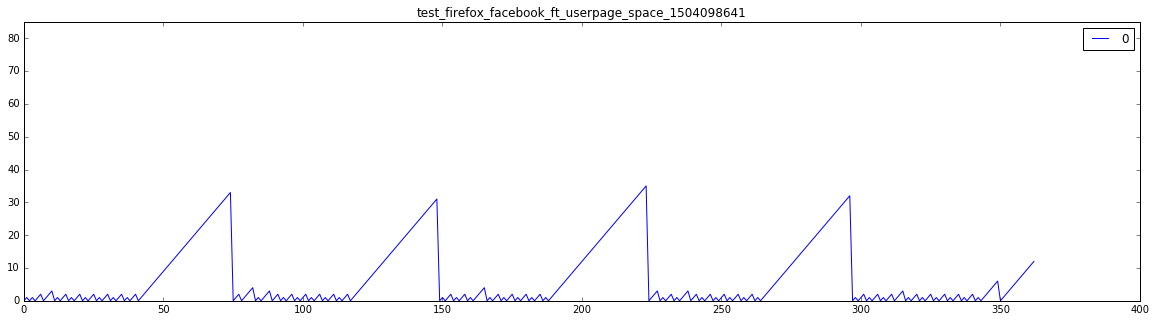

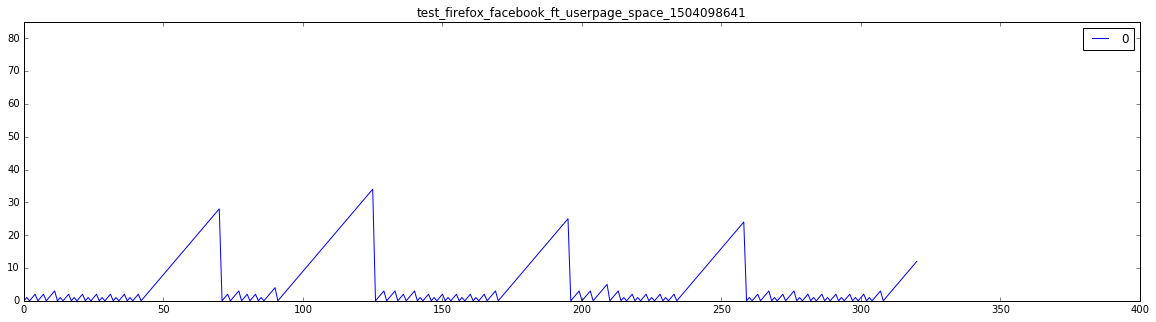

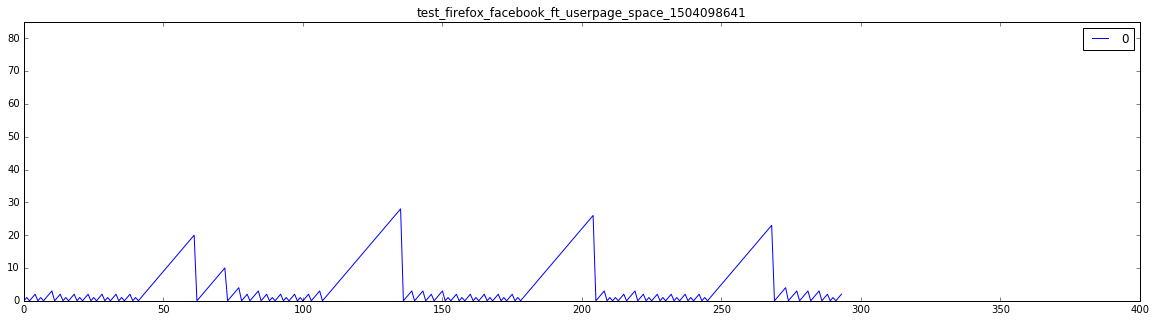

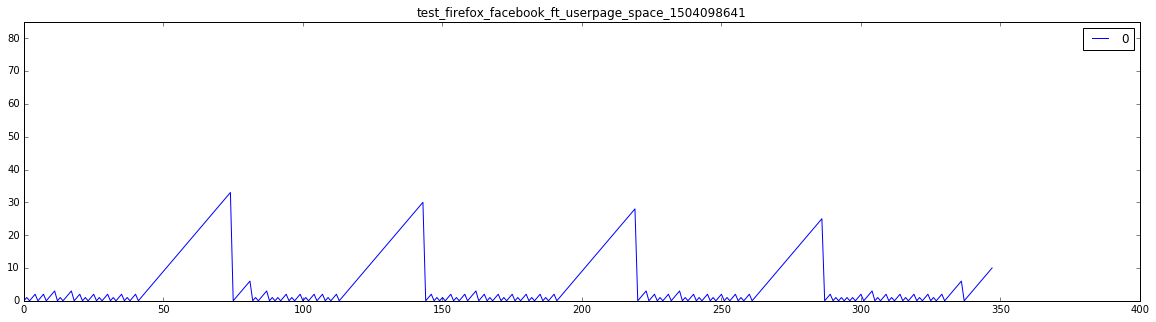

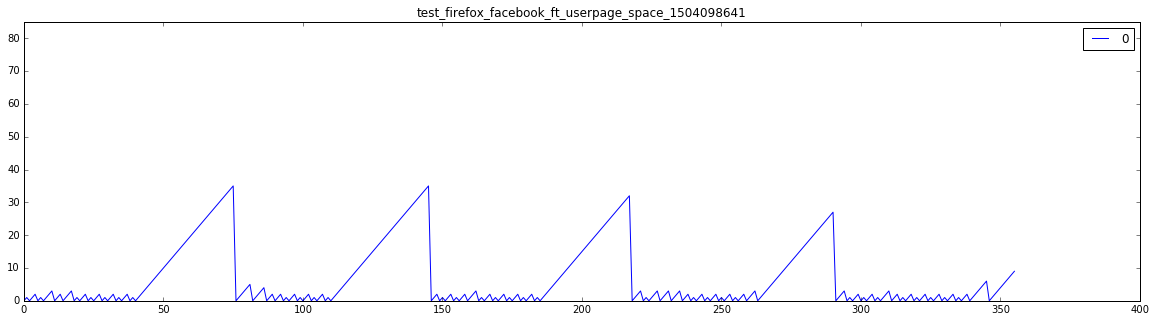

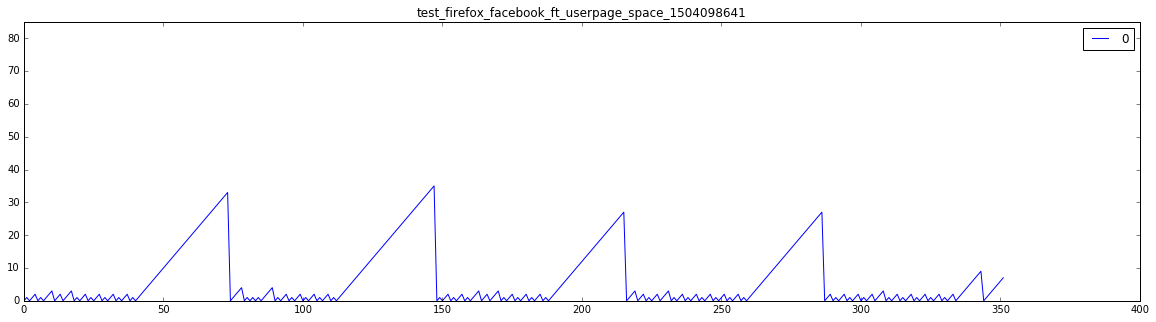

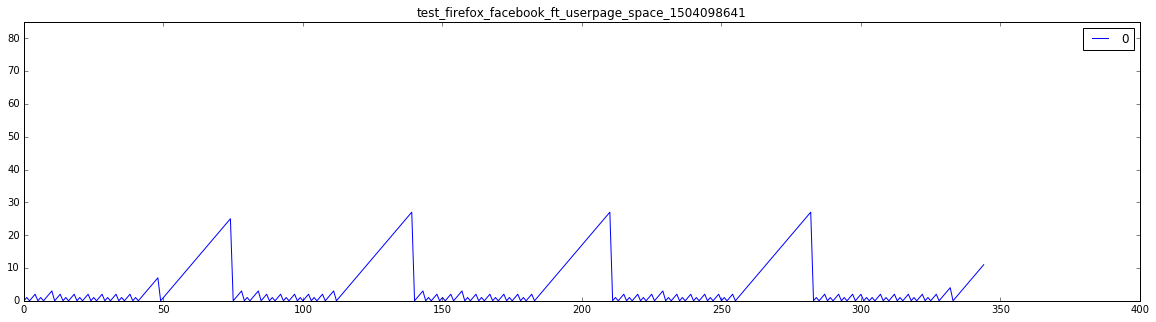

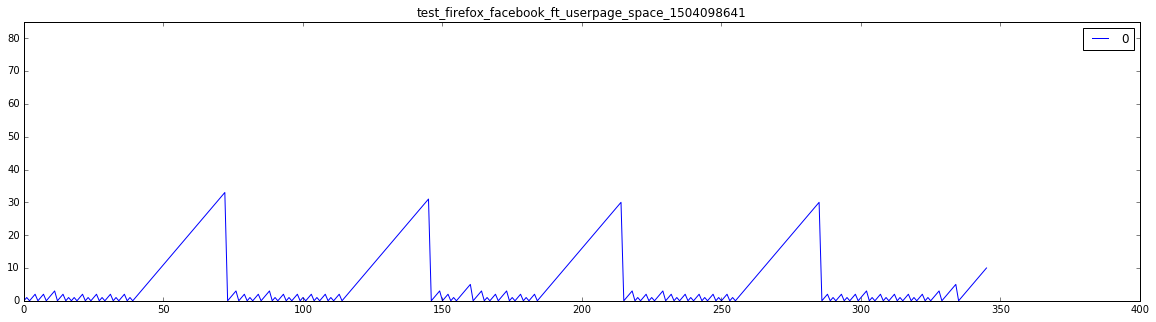

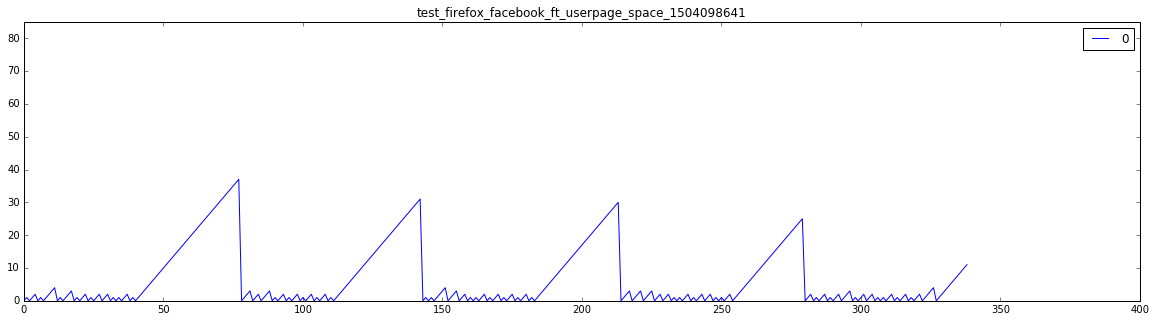

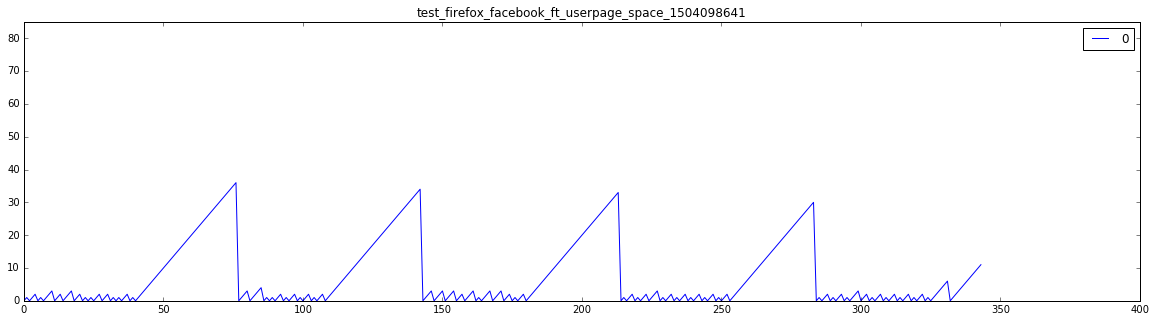

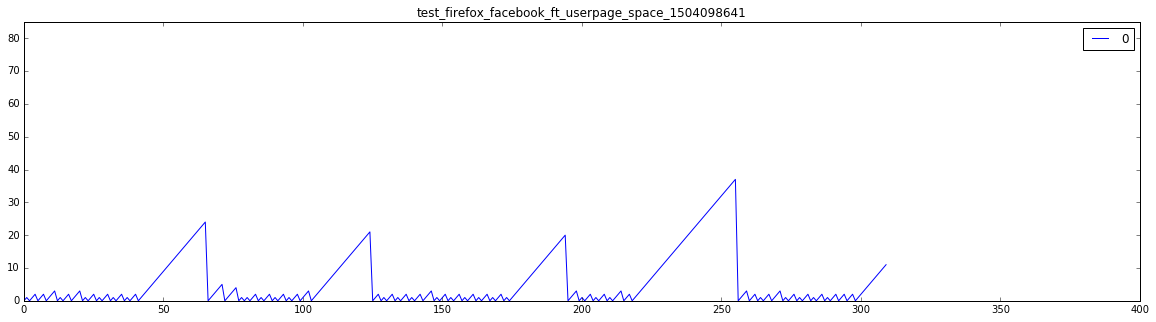

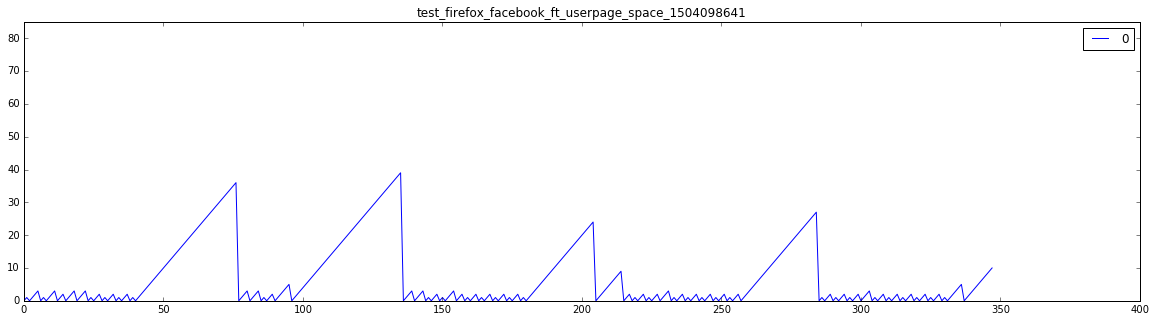

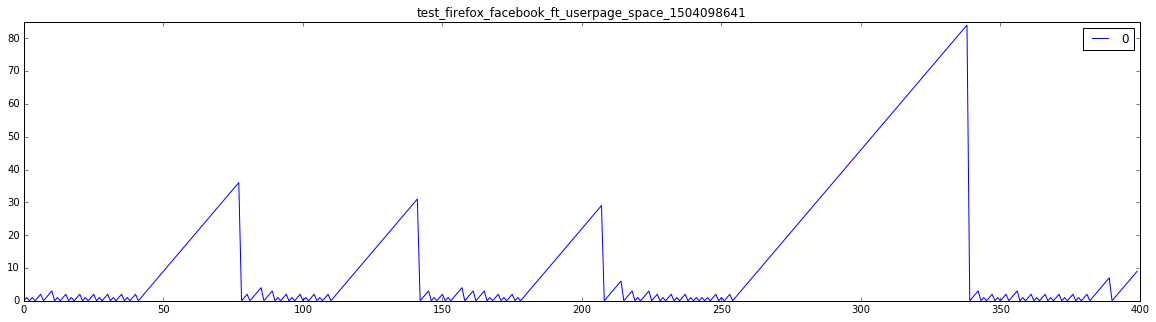

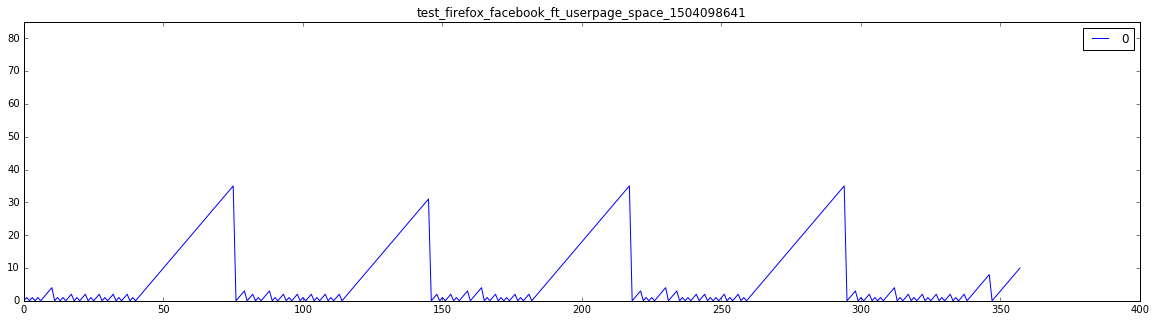

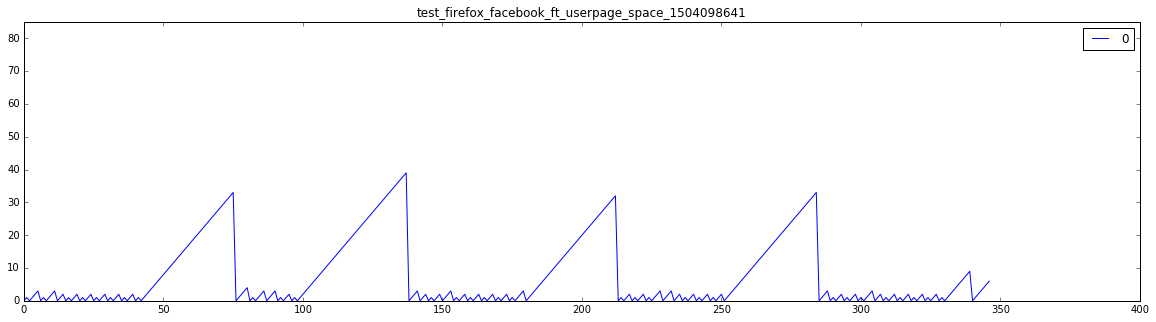

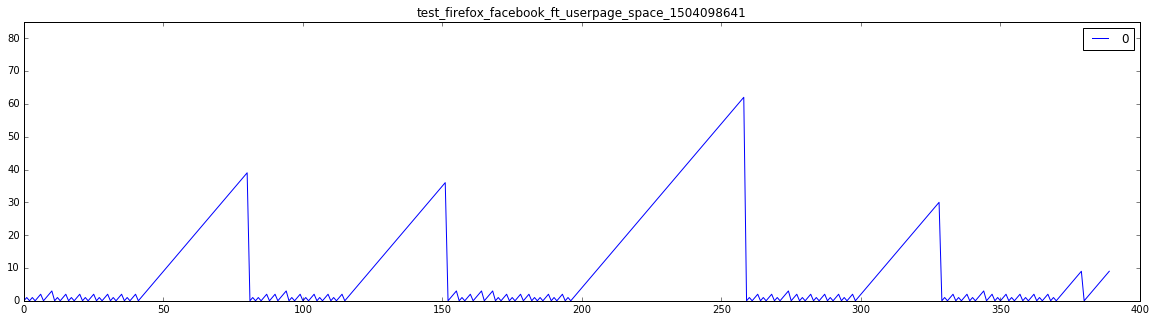

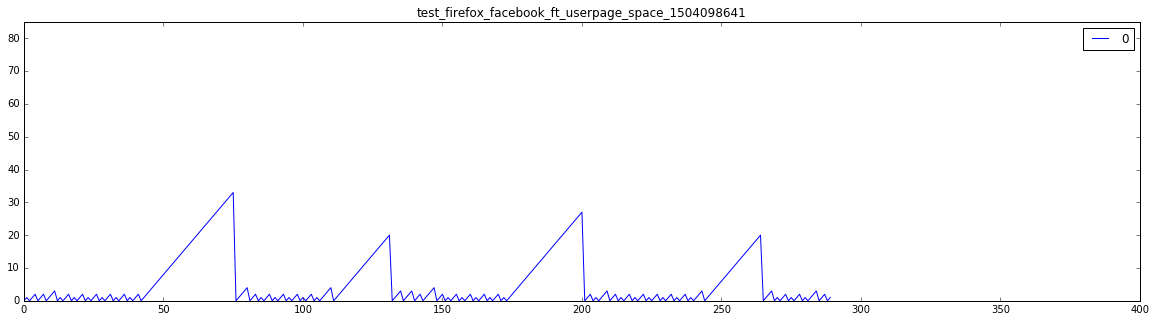

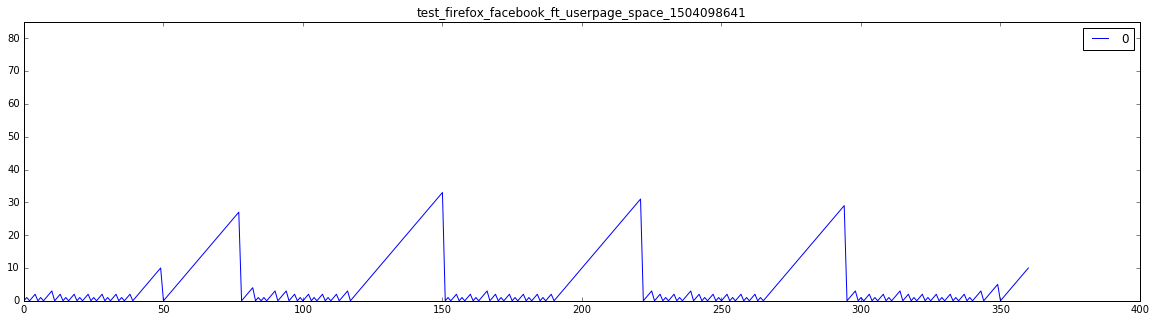

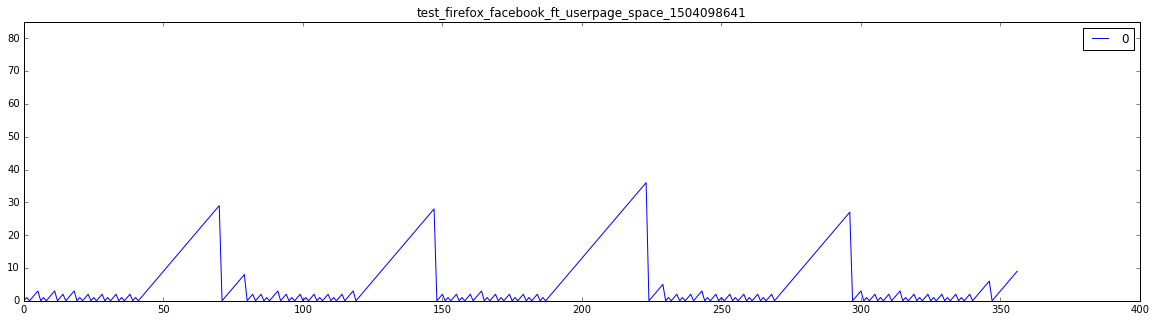

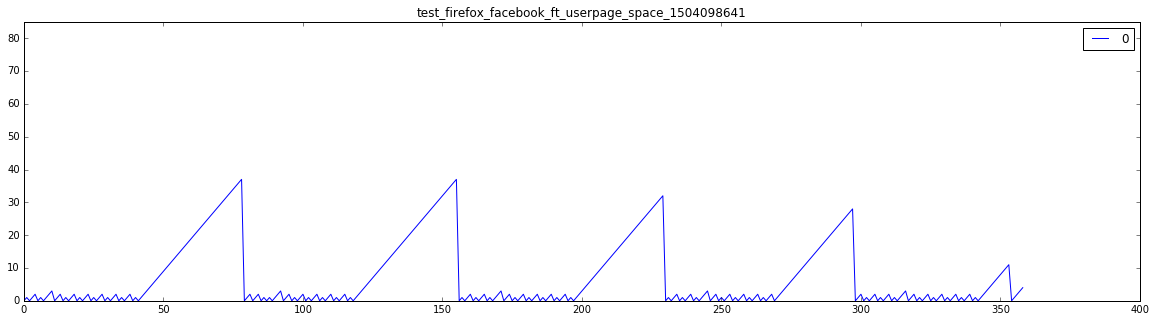

In [76]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from os import environ

filename = "/home/nbuser/result_sc1.json"
fig_no = 30
fig_size = 30

pd.options.display.float_format = '{:10,.2f}'.format
pd.set_option('display.width', 999)

with open(filename) as data_file:
    data = json.load(data_file)
fps = data["video-recording-fps"]
remove_data = ["video-recording-fps"]
for item in remove_data:
    del data[item]

cols = list()
d = pd.DataFrame(data)
for col in d:
    cols.append(str(col))
for col in cols:
    firefox_case = col
    firefox_df = pd.concat([pd.DataFrame(d.loc[:, col]['time_list']).T], axis=1)

non_freeze_frame_timestamps = pd.concat([pd.DataFrame(d[column]['time_list']) for column in d], axis=1).loc[:,'non_freeze_frame_timestamps']
non_freeze_frame_timestamps.columns = d.columns
timestamps_list = list(non_freeze_frame_timestamps)

folder = pd.concat([pd.DataFrame(d[column]['time_list']) for column in d], axis=1).loc[:,'folder']
folder.columns = d.columns
folder_list = list(folder)

result_list = []
for i in range(len(timestamps_list)):
    original_data_list = timestamps_list[i]
    output_list = []
    temp_list = []
    for j in range(len(original_data_list)-1):
        temp_list.append(original_data_list[j+1]-original_data_list[j])

    output_list = [n for idx in temp_list for n in range(int(idx/11.11)+1)]
    result_list.append(output_list)

max_x = max([len(r) for r in result_list])
max_y = max([max(r) for r in result_list])

for result in result_list:
    ft = pd.DataFrame(result)
    ft.plot(subplots=False, layout=(1,1), figsize=(20,5), xlim=(0,max_x), ylim=(0,max_y+1))
    plt.title(folder_list[i])
    plt.show()